In [1]:
import numpy as np
import os
import pandas as pd
import cv2

def iou(y_true, y_pred):
    intersection = np.sum((y_true * y_pred))
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    return intersection / union

def precision(y_true, y_pred):
    tp = np.sum((y_true * y_pred))
    fp = np.sum((y_pred > y_true))
    return tp / (tp + fp)

def recall(y_true, y_pred):
    tp = np.sum((y_true * y_pred))
    fn = np.sum((y_true > y_pred))
    return tp / (tp + fn)

def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * p * r / (p + r)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

predicted_binary_masks_folder = "test/predicted_binary_masks"
binary_masks_folder = "test/binary_masks"

ious = []
precisions = []
recalls = []
f1s = []
accuracies = []
file_names = []

for filename in os.listdir(predicted_binary_masks_folder):
    # Read the predicted binary mask
    y_pred = np.array(cv2.imread(os.path.join(predicted_binary_masks_folder, filename), cv2.IMREAD_GRAYSCALE), np.bool)
    
    # Read the corresponding ground truth binary mask
    y_true = np.array(cv2.imread(os.path.join(binary_masks_folder, filename), cv2.IMREAD_GRAYSCALE), np.bool)
    
    # Compute the metrics
    ious.append(iou(y_true, y_pred))
    precisions.append(precision(y_true, y_pred))
    recalls.append(recall(y_true, y_pred))
    f1s.append(f1(y_true, y_pred))
    accuracies.append(accuracy(y_true, y_pred))
    file_names.append(filename)

# Compute the mean values of the metrics
mean_iou = np.mean(ious)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1 = np.mean(f1s)
mean_accuracy = np.mean(accuracies)

# Collect the metrics in a pandas dataframe
metrics = {'Image Name': file_names, 'IoU': ious, 'Precision': precisions, 'Recall': recalls, 'F1': f1s, 'Accuracy': accuracies}
df = pd.DataFrame(metrics)

# Save the dataframe as a csv file
df.to_csv("metrics.csv", index=False)

print("Mean IoU: ", mean_iou)
print("Mean Precision: ", mean_precision)
print("Mean Recall: ", mean_recall)
print("Mean F1: ", mean_f1)
print("Mean Accuracy: ", mean_accuracy)


/tmp/ipykernel_12287/2992432634.py:41: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = np.array(cv2.imread(os.path.join(predicted_binary_masks_folder, filename), cv2.IMREAD_GRAYSCALE), np.bool)
/tmp/ipykernel_12287/2992432634.py:44: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_true = np.array(cv2.imread(os.path.join(binary_masks_folder, f

Mean IoU:  0.9722913112828495
Mean Precision:  0.9772785660888936
Mean Recall:  0.994691384634901
Mean F1:  0.9857111268090869
Mean Accuracy:  0.9992986345053247


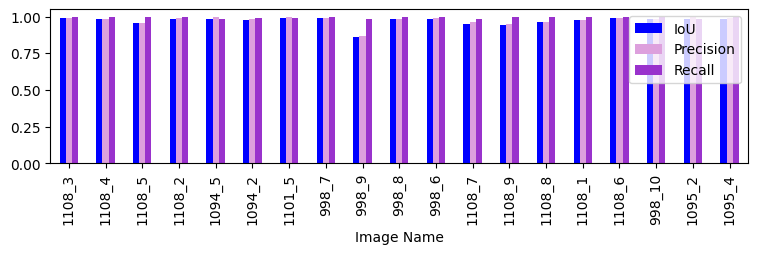

In [9]:
# Import Library

import pandas as pd 
import matplotlib.pyplot as plt 


x_axis = np.arange(len(ious))
data= pd.read_csv("metrics.csv")


my_color =['blue','plum','darkorchid']

df=pd.DataFrame(data, columns=["Image Name","IoU","Precision","Recall"])

df.plot(x="Image Name", y=["IoU","Precision","Recall"], kind="bar",figsize=(9,2), color=my_color)


file_names = [f.split('.')[0] for f in file_names]
plt.xticks(x_axis, file_names, rotation=90)

plt.savefig('metrics.pdf', bbox_inches = 'tight')

In [3]:
data

,Image Name,IoU,Precision,Recall,F1,Accuracy
0,1108_3.png,0.989024,0.989410,0.999606,0.994482,0.998368
1,1108_4.png,0.982561,0.984379,0.998123,0.991204,0.999831
2,1108_5.png,0.955028,0.955169,0.999846,0.976997,0.999641
3,1108_2.png,0.986345,0.988470,0.997825,0.993126,0.999671
4,1094_5.png,0.984442,0.997488,0.986888,0.992160,0.998443
5,1094_2.png,0.979630,0.985186,0.994276,0.989710,0.998211
6,1101_5.png,0.991582,0.997264,0.994287,0.995773,0.999261
7,998_7.png,0.991995,0.994334,0.997634,0.995981,0.999761
8,998_9.png,0.860514,0.871734,0.985263,0.925028,0.999735
9,998_8.png,0.983834,0.987807,0.995928,0.991851,0.999719
